# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"C:\Users\felip\OneDrive\Ebac\Descritiva 2\Profissão Cientista de Dados M10 A1.csv.csv")

df.head(3)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


In [23]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

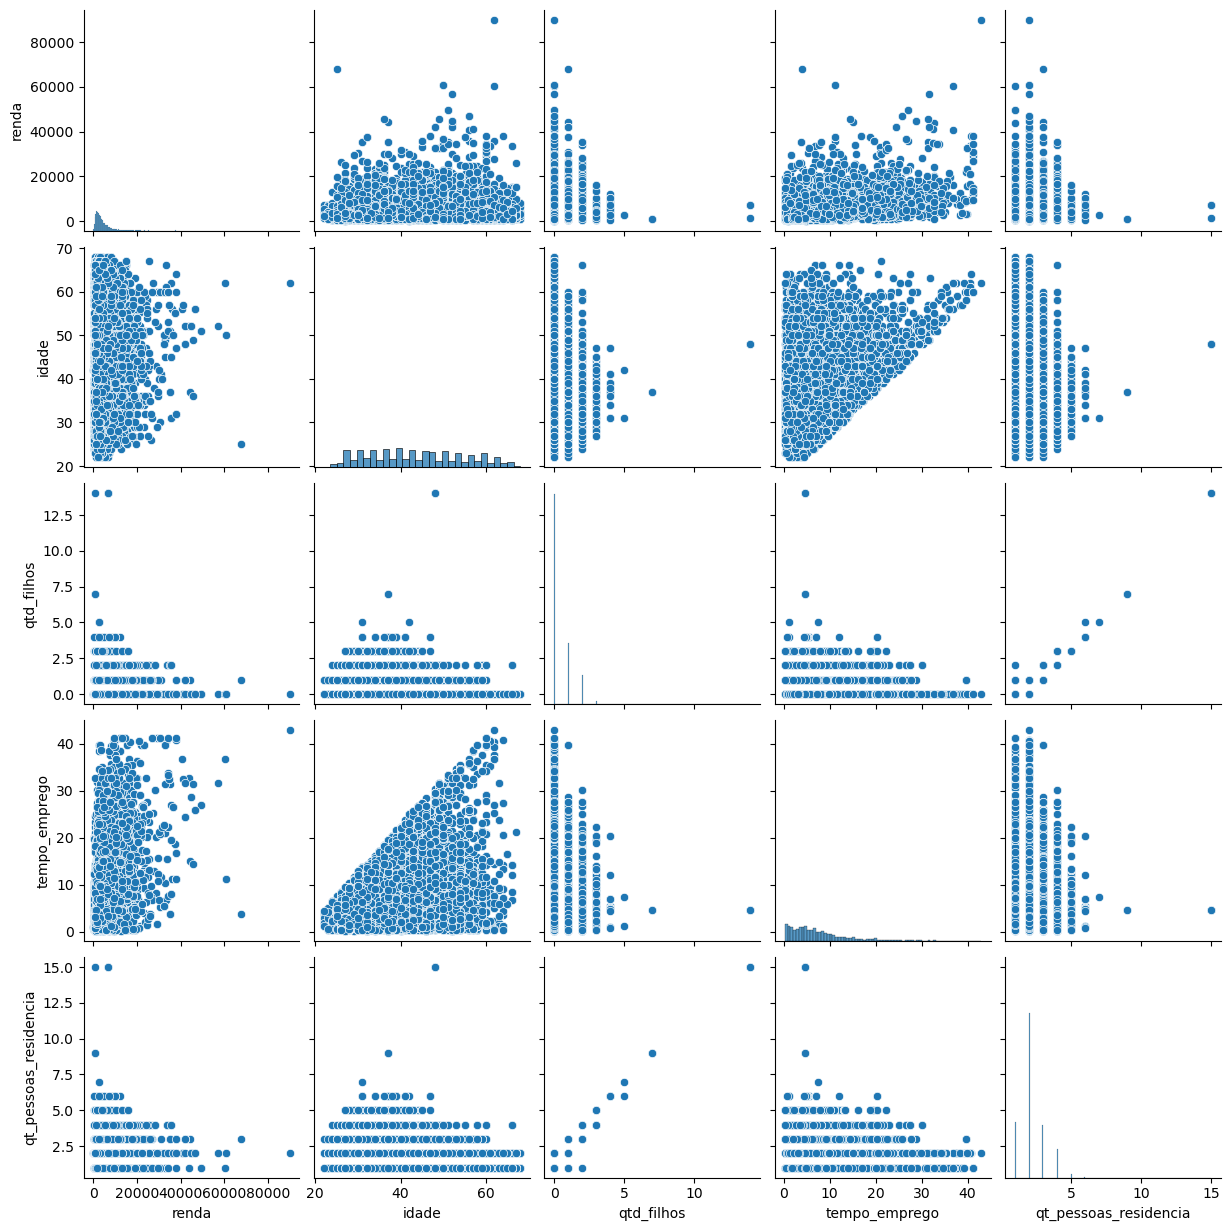

In [24]:
#tratando Outliers (teste)


sns.pairplot(df, vars=["renda", "idade", "qtd_filhos","tempo_emprego","qt_pessoas_residencia"])



In [26]:
df[["renda", "idade", "qtd_filhos","tempo_emprego","qt_pessoas_residencia"]].corr()



,renda,idade,qtd_filhos,tempo_emprego,qt_pessoas_residencia
renda,1.000000,0.042570,0.009567,0.394235,0.020977
idade,0.042570,1.000000,-0.364303,0.323934,-0.338805
qtd_filhos,0.009567,-0.364303,1.000000,-0.074250,0.896488
tempo_emprego,0.394235,0.323934,-0.074250,1.000000,-0.065748
qt_pessoas_residencia,0.020977,-0.338805,0.896488,-0.065748,1.000000


### Ná análise de correlação, as unicas moderadas e fortes que conseguimos tirar é a correlação entre Renda e tempo empregado, onde quanto maior o tempo maior a renda. Além disso tempos uma correlação moderada entre idade e tempo no emprego

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

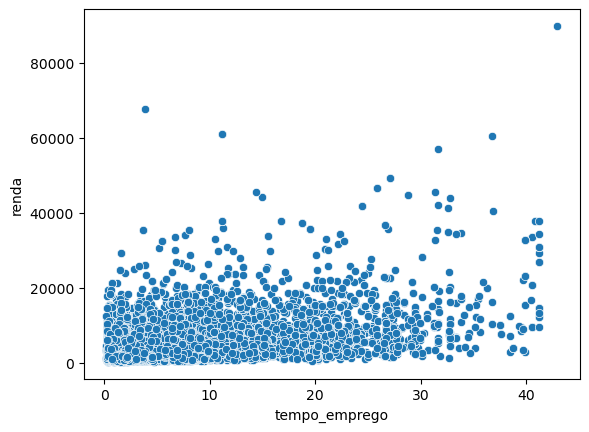

In [37]:
sns.scatterplot(df,x="tempo_emprego",y="renda")

<Axes: xlabel='tempo_emprego', ylabel='renda'>

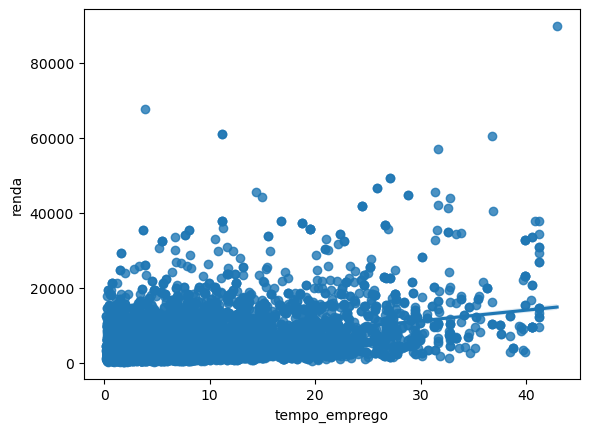

In [38]:
sns.regplot(df,x="tempo_emprego",y="renda")


3) Na su aopinião, há outliers na variável renda?

Sim, havia outlier e tiramos com log, conforme ensinado em aula

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [39]:
df["log_renda"] = np.log1p(df["renda"])


<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

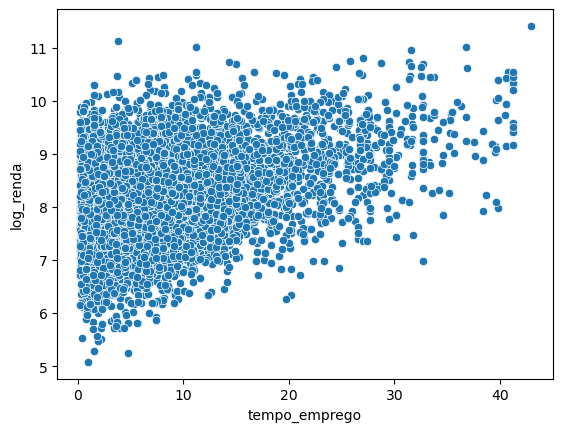

In [40]:
sns.scatterplot(df,x="tempo_emprego",y="log_renda")

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

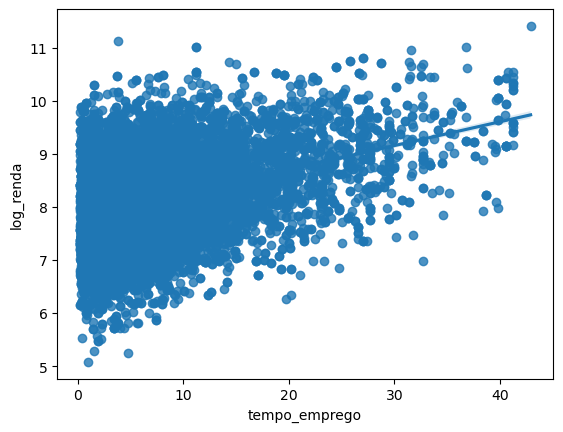

In [41]:
sns.regplot(df,x="tempo_emprego",y="log_renda")

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Melhorou. A correlação ficou visualmente mais clara, o que permite perceber mais a movimentação da renda conforme o tempo de emprego.